In [5]:
import cv2
# https://inhovation97.tistory.com/56
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.patches as patches
from tqdm import tqdm
import numpy as np
from src import correlation, normalize_image, three_channel_correlation
import tqdm

In [6]:
image = cv2.imread('data/image01.jpg')
image = image[:,:,::-1] # BGR -> RGB
patch = cv2.imread('data/patch1.png')
patch = patch[:,:,::-1] # BGR -> RGB

normalized_image = normalize_image(image)
normalized_patch = normalize_image(patch)

In [4]:
output = three_channel_correlation(normalized_image, normalized_patch)

In [16]:
print(patch.shape)
print(image.shape)

(280, 280, 3)
(1202, 850, 3)


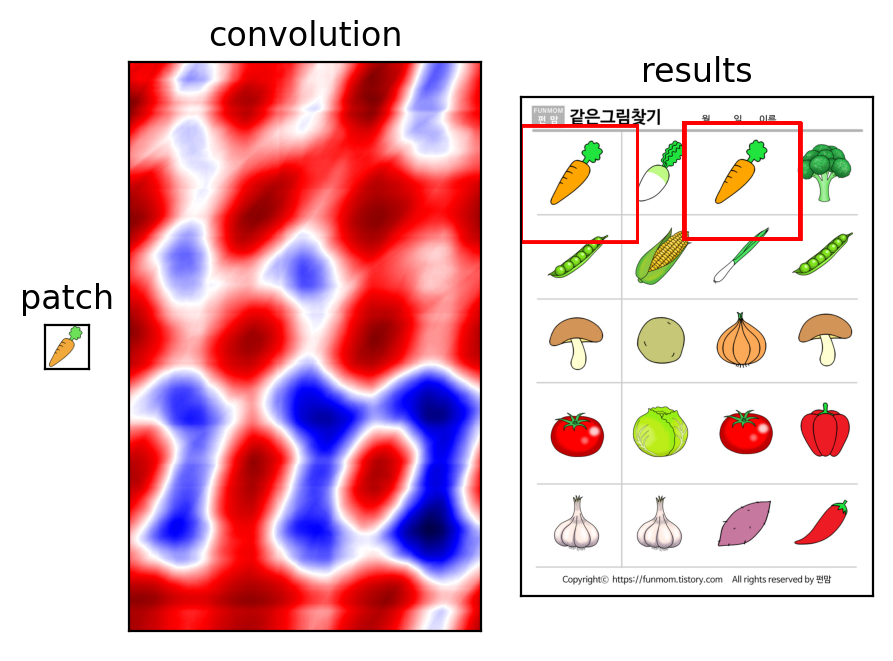

In [14]:
#print the result
fig = plt.figure(dpi=200, tight_layout=True)
gs = gridspec.GridSpec(nrows = 1, ncols = 4,width_ratios = [8, 1, 8, 8])

#patch1
# ax0 = plt.subplot(gs[0])
# ax0.imshow(globals()['patch1'])
# ax0.set_title('patch1')
# ax0.set_xticks([])
# ax0.set_yticks([])

ax1 = plt.subplot(gs[1])
ax1.imshow(patch)
ax1.set_title('patch')
ax1.set_xticks([])
ax1.set_yticks([])

#show convolution results.
ax2 = plt.subplot(gs[2])
#ax2.imshow(image)
ax2.imshow(output, cmap="seismic", interpolation= 'bilinear')
ax2.set_title('convolution')
ax2.set_xticks([])
ax2.set_yticks([])

#find the bounding box
ax3 = plt.subplot(gs[3])
output_normalized = output + output.min()
output_normalized /= output_normalized.max()

# (TODO)
# cv2 에서 그림그리는거 찾기
for i in range (output_normalized.shape[0]):
    for j in range (output_normalized.shape[1]):
        if output_normalized[i,j] >= 0.999:
            rect = patches.Rectangle((j, i), patch.shape[0], patch.shape[1], linewidth=1, edgecolor='r', facecolor='none')
            ax3.add_patch(rect)
ax3.imshow(image)
ax3.set_title('results')
ax3.set_xticks([])
ax3.set_yticks([])

#patch2
# ax4 = plt.subplot(gs[4])
# ax4.imshow(image)
# ax4.set_title('original')
# ax4.set_xticks([])
# ax4.set_yticks([])

# ax5 = plt.subplot(gs[5])
# ax5.imshow(globals()['patch2'])
# ax5.set_title('patch2')
# ax5.set_xticks([])
# ax5.set_yticks([])

# ax6 = plt.subplot(gs[6])
# ax6.imshow(globals()["convolution_map2"], cmap="seismic", interpolation= 'bilinear')
# ax6.set_xticks([])
# ax6.set_yticks([])

# ax7 = plt.subplot(gs[7])
# globals()["convolution_map2_normalized"] = globals()["convolution_map2"] + globals()["convolution_map2"].min()
# globals()["convolution_map2_normalized"] /= globals()["convolution_map2_normalized"].max()
# for i in range (globals()["convolution_map2_normalized"].shape[0]):
#     for j in range (globals()["convolution_map2_normalized"].shape[1]):
#         if globals()["convolution_map2_normalized"][i,j] >= .97:
#             rect = patches.Rectangle((j - patch_height / 2, i - patch_width / 2), patch_height, patch_width, linewidth=1, edgecolor='r', facecolor='none')
#             ax7.add_patch(rect)
# ax7.imshow(image)
# ax7.set_xticks([])
# ax7.set_yticks([])

# #patch3
# # ax8 = plt.subplot(gs[8])
# # ax8.imshow(globals()['patch3'])
# # ax8.set_title('patch3')
# # ax8.set_xticks([])
# # ax8.set_yticks([])

# ax9 = plt.subplot(gs[9])
# ax9.imshow(globals()['patch3'])
# ax9.set_title('patch3')
# ax9.set_xticks([])
# ax9.set_yticks([])

# ax10 = plt.subplot(gs[10])
# ax10.imshow(globals()["convolution_map3"], cmap="seismic", interpolation= 'bilinear')
# ax10.set_xticks([])
# ax10.set_yticks([])

# ax11 = plt.subplot(gs[11])
# globals()["convolution_map3_normalized"] = globals()["convolution_map3"] + globals()["convolution_map3"].min()
# globals()["convolution_map3_normalized"] /= globals()["convolution_map3_normalized"].max()
# for i in range (globals()["convolution_map3_normalized"].shape[0]):
#     for j in range (globals()["convolution_map3_normalized"].shape[1]):
#         if globals()["convolution_map3_normalized"][i,j] >= .97:
#             rect = patches.Rectangle((j - patch_height / 2, i - patch_width / 2), patch_height, patch_width, linewidth=1, edgecolor='r', facecolor='none')
#             ax11.add_patch(rect)
# ax11.imshow(image)
# ax11.set_xticks([])
# ax11.set_yticks([])

plt.show()